In [44]:
# importing libraries
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 

In [45]:
# uploading our CSV file 
df = pd.read_csv(r"D:\Data\Country-data.csv" , encoding = 'utf-8')

In [82]:
df2 = pd.read_csv(r"D:\Data\Country-data.csv" , encoding = 'utf-8')

## Getting familiar with our data 

In [46]:
df.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840


## this is unsupervised ML so i don't need country column

In [47]:
df = df.drop('country' , axis=1)

In [48]:
df.shape

(167, 9)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   child_mort  167 non-null    float64
 1   exports     167 non-null    float64
 2   health      167 non-null    float64
 3   imports     167 non-null    float64
 4   income      167 non-null    int64  
 5   inflation   167 non-null    float64
 6   life_expec  167 non-null    float64
 7   total_fer   167 non-null    float64
 8   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 11.9 KB


## there are no nulls

In [50]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


## our data has outliers and it needs to be scales so we'll do it later

In [51]:
# check duplicates
df.duplicated().sum()

0

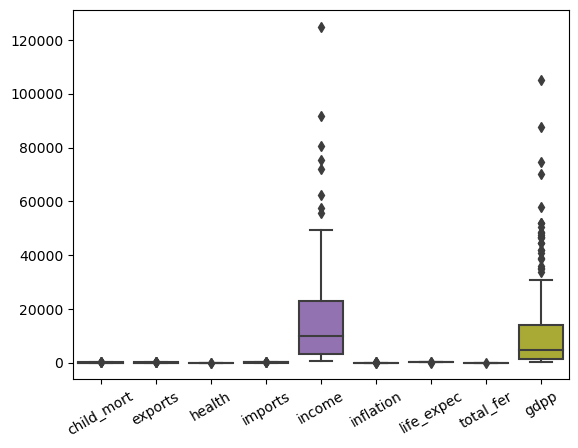

In [52]:
# check outliers
sns.boxplot(data = df)
plt.xticks(rotation=30)  
plt.show();

## there are outliers in two columns but up to this data, outliers are acceptable

In [53]:
# check duplicates
df.duplicated().sum()

0

## lets scale our data before building our models, i'll use robust scaler because it can handle outliers

In [54]:
# making a copy
# df1=df.copy()

In [55]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

scaled_data = scaler.fit_transform(data)

df[df.columns[:]] = scaled_data

In [56]:
df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.316620,-0.907441,0.342391,0.056042,-0.429416,0.453020,-1.469565,1.635492,-0.322877
1,-0.050139,-0.254083,0.062500,0.185639,-0.001543,-0.100671,0.278261,-0.364508,-0.044811
2,0.148561,0.123412,-0.584239,-0.416813,0.151196,1.197987,0.295652,0.230216,-0.015723
3,1.851439,0.990926,-0.942935,-0.014011,-0.208794,1.902685,-1.130435,1.798561,-0.088836
4,-0.167131,0.381125,-0.078804,0.546410,0.470044,-0.441834,0.321739,-0.134293,0.592767


## let's see correlation in our data

Text(0.5, 1.0, 'Correlation Matrix')

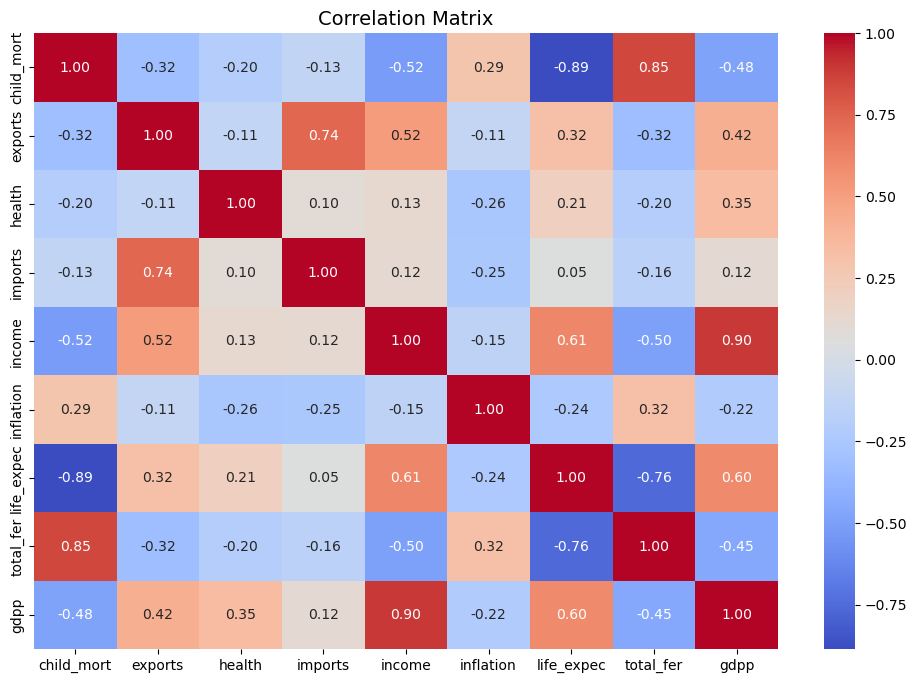

In [57]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix', fontsize=14)


## there are many columns have relations with each other

### let's doing PCA to reuct dimension

In [59]:
from sklearn.decomposition import PCA
n_components = 9  # You can change this number
pca = PCA(n_components=n_components)
pca.fit(scaled_data)
explained_variance_ratio = pca.explained_variance_ratio_

In [60]:
explained_variance_ratio

array([0.48841948, 0.16547786, 0.14891017, 0.0942477 , 0.0600765 ,
       0.01522075, 0.01207877, 0.00994172, 0.00562705])

### i'll use five components cause them give me 0.95% of variance

In [62]:
n_components_selected = 5
pca = PCA(n_components=n_components_selected)
reduced_data = pca.fit_transform(scaled_data)


In [63]:
reduced_data

array([[-2.29455931e+00, -7.53647921e-02, -2.91972055e-01,
         1.29993982e+00, -1.97165029e-01],
       [-2.74219649e-01, -6.85631098e-01, -4.10398143e-01,
        -9.79856160e-01, -9.40391846e-02],
       [-7.16440516e-01,  7.81059579e-01,  3.89555308e-02,
        -1.04882945e+00,  3.76110205e-01],
       [-2.05968854e+00,  1.42445365e+00,  1.63672110e+00,
         9.61192860e-01,  6.59262694e-01],
       [ 6.30217657e-01, -7.81486030e-01,  8.89185696e-02,
        -5.96072534e-01,  1.74139359e-01],
       [-4.53014399e-01,  1.48034077e+00, -1.01268920e+00,
        -9.40678893e-01, -5.00446044e-01],
       [-7.21541617e-01, -3.18605767e-01, -3.71361995e-01,
        -1.08935764e+00,  2.76305704e-01],
       [ 3.01014874e+00,  7.26967696e-01, -2.11070323e+00,
         5.98449475e-01,  2.37184253e-01],
       [ 3.34708098e+00,  1.82596851e-01, -8.73309457e-01,
         5.63601166e-01, -5.12650309e-01],
       [-4.75704546e-01,  6.25728586e-01,  9.54928899e-02,
        -6.93208018e-01

### before doing our KMean model let's doing elbow method

C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable 

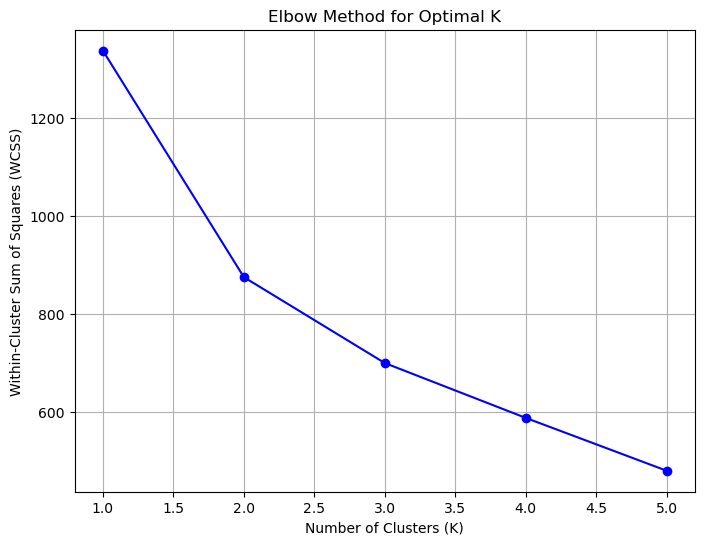

In [69]:
from sklearn.cluster import KMeans
a = []
# Try different values of K from 1 to a maximum number
for k in range(1, 6):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(reduced_data)
    a.append(kmeans.inertia_)

# Plot the elbow method graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 6), a, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.grid(True)
plt.show()


## we'll use 3 clusters

### let's start with our first model

In [89]:
kmeans = KMeans(n_clusters = 3,random_state = 42)
kmeans.fit(reduced_data)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [90]:
#count number of records in every cluster
pd.Series(kmeans.labels_).value_counts()

2    85
1    53
0    29
dtype: int64

In [91]:
# checking our model using Silhouette coefficient
from sklearn import metrics
metrics.silhouette_score(reduced_data, kmeans.labels_)


0.29875477658785343

In [92]:
cluster_labels = kmeans.fit_predict(reduced_data)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [93]:
preds = kmeans.labels_
kmeans_df = pd.DataFrame(df2)
kmeans_df['KMeans_Clusters'] = preds
kmeans_df.head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMeans_Clusters
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2


### let's try using 2 clusters

In [85]:
kmeans = KMeans(n_clusters = 2,random_state = 42)
kmeans.fit(reduced_data)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=2, random_state=42)

In [86]:
pd.Series(kmeans.labels_).value_counts()

0    130
1     37
dtype: int64

In [87]:
from sklearn import metrics
metrics.silhouette_score(reduced_data, kmeans.labels_)


0.41971857277261077

In [88]:
cluster_labels = kmeans.fit_predict(reduced_data)
preds = kmeans.labels_
kmeans_df = pd.DataFrame(df2)
kmeans_df['KMeans_Clusters'] = preds
kmeans_df.head(5)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMeans_Clusters
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0


## let's use Hierarchical model

In [104]:
import scipy.cluster.hierarchy as hcluster
from sklearn.cluster import AgglomerativeClustering

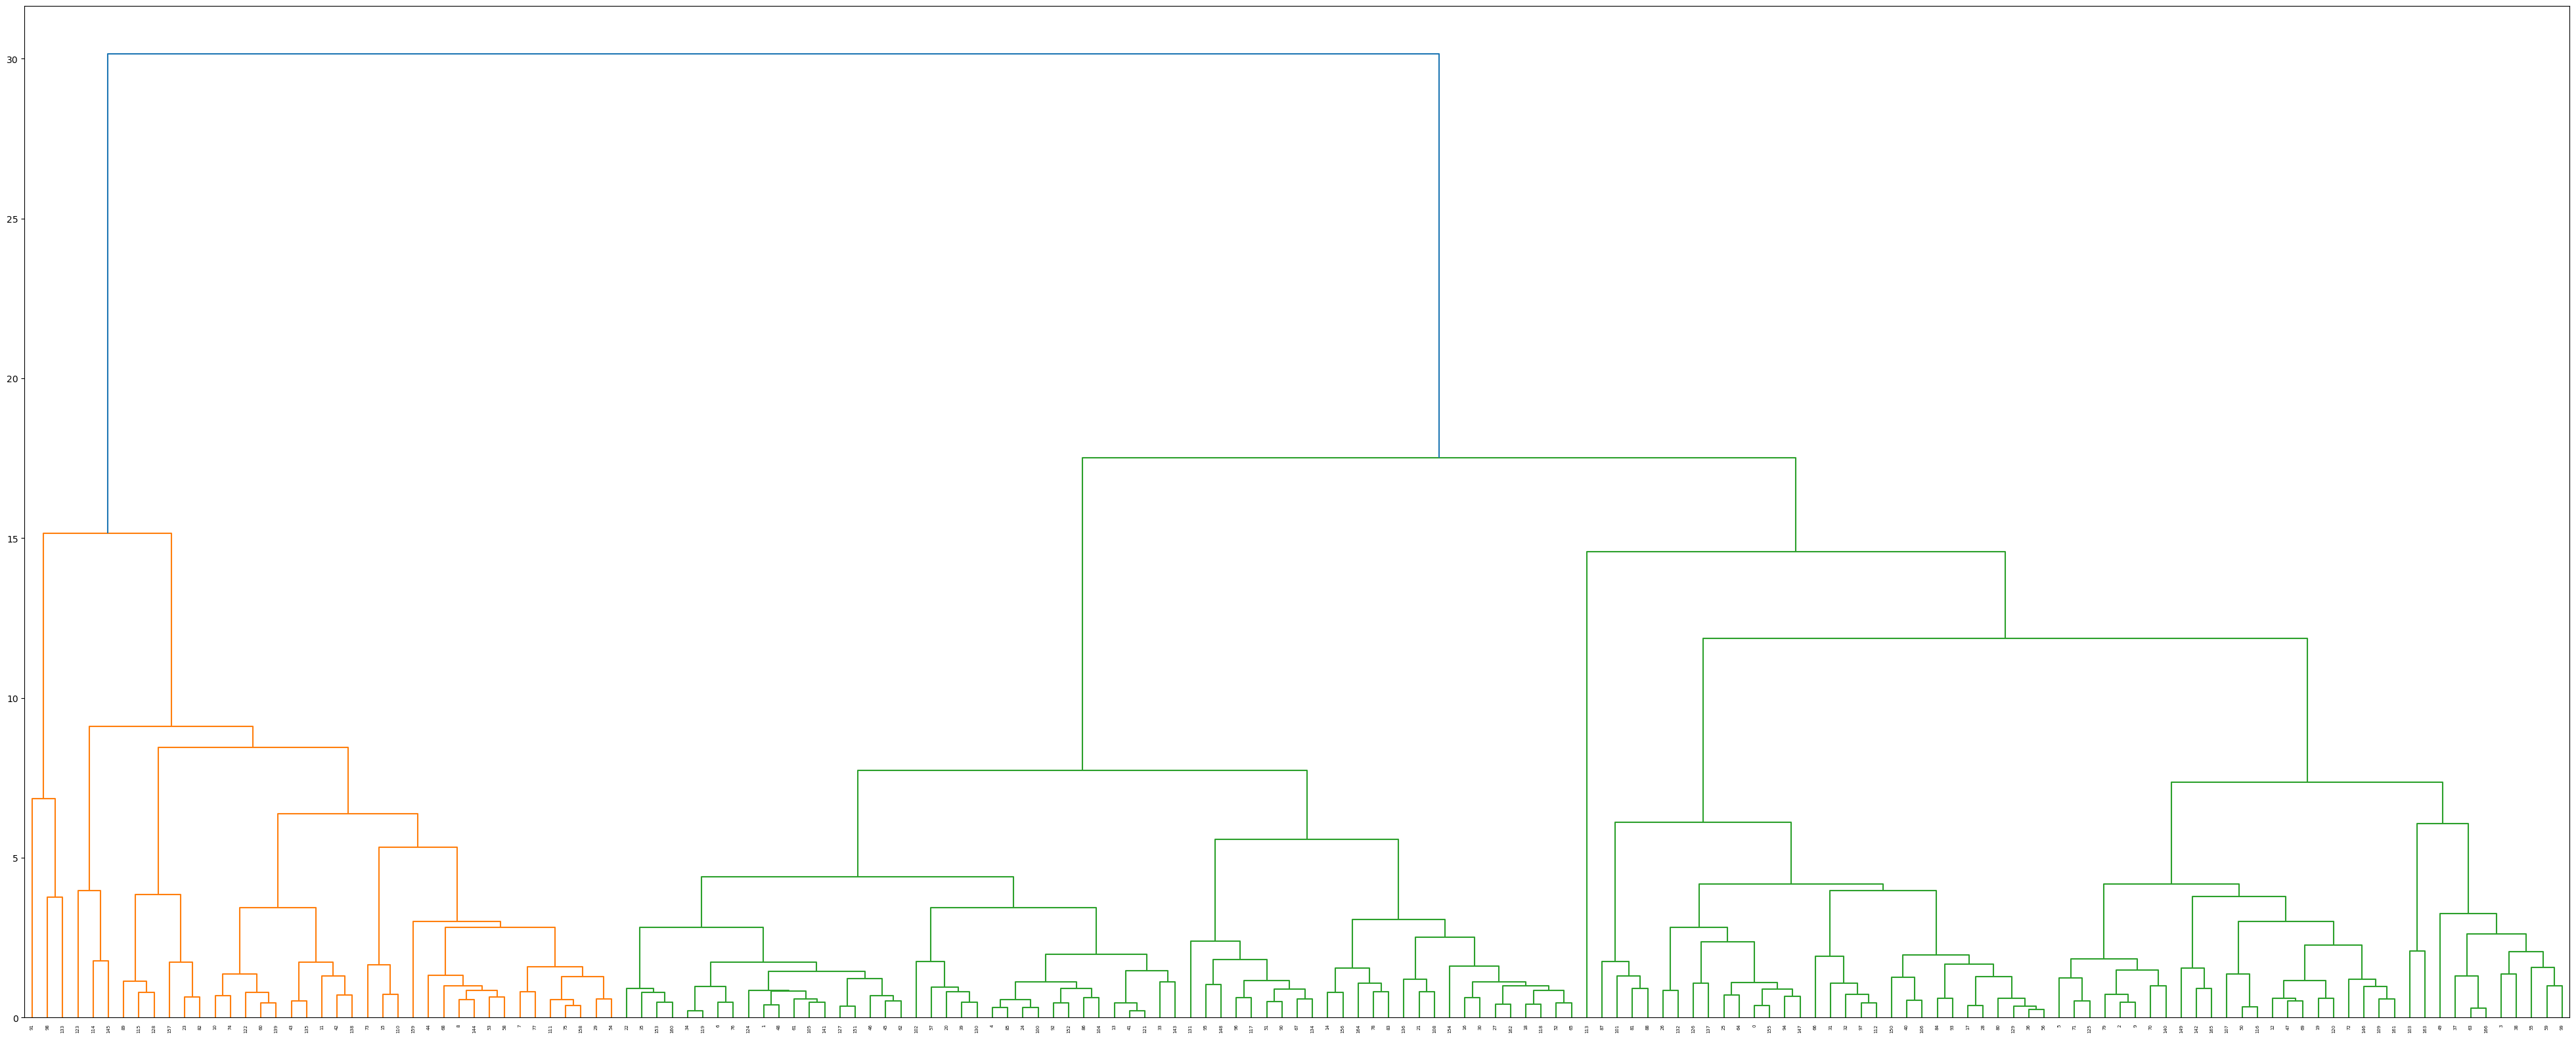

In [106]:
#plotting dendogram
plt.figure(figsize=(50, 20))
dend = hcluster.dendrogram(hcluster.linkage(reduced_data,method='ward'))


#### from the above dendro i'll go with 3 clusters

In [98]:
# Getting labels from Agglomearative Hierarchical clustering
hcluster = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')  
hcluster.fit_predict(reduced_data)
hcluster_label = hcluster.labels_

In [100]:
hcluster_df = pd.DataFrame(df2)
#adding hcluster labels in hcluster_df
hcluster_df['hcluster'] = hcluster_label
#first few rows of hcluster_df
hcluster_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMeans_Clusters,hcluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2,2
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2,2


In [101]:
from sklearn import metrics
metrics.silhouette_score(reduced_data, hcluster.labels_)


0.23918480296921388